# Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [55]:
data = pd.read_csv('Salary_Data.csv')

In [52]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


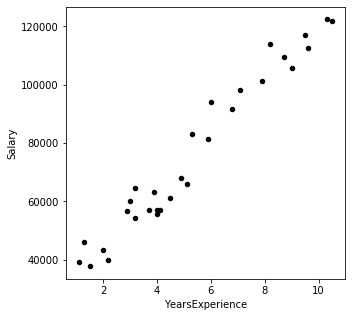

In [58]:
data.plot(kind="scatter", x="YearsExperience",y="Salary",figsize=(5,5),color="black")

### The scatter plot shows beautifull linear relationship between years of experience and salary

The scikit library includes a wide range of predictive modeling functions. Let’s load its linear regression training function and fit the line to the data. We divide the data into X – the independent variable and y – the dependent variable, then the set of our observations is divided into a part for training our model and a part for testing, on which we will check how good our model is. We create an object of the appropriate class (in this case LinearRegression), on which we call the fit method, giving it the training set, target values and possible parameters as arguments. When the model learns, we can call the predict method, which will return the predicted value. 

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [70]:
X = data['YearsExperience'].values.reshape(-1,1)
Y = data['Salary']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)

In [9]:
print(regressor.intercept_)
print(regressor.coef_)

26777.391341197632
[9360.26128619]


## Model Evaluation

In [10]:
print('Linear Regression R squared: %.4f' % regressor.score(X_test, Y_test))

Linear Regression R squared: 0.9741


### In other words, our model fits the line:

y = 2677.39 + 9360.26 * ‚age’

### In our model, 97.41% of the variation in y (salary) can be explained by the X (YearsExperience)

##
Mean square error (RMSE) is a measure of the performance of the model. It does this by measuring the difference between the predicted values and the actual values of the dependent variable. RMSE is a way of measuring how good our predictive model is over the actual data, the smaller the RMSE, the better the model will behave:

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE: %.2f'%rmse )

RMSE: 4834.26


##
RMSE is expressed in the same units as our dependent variable y (salary) and in our case it means that on average the prediction of the variable has an error of around 4800. The salary varies between 39000 and 120000 so error 4800, although it is quite big it is acceptable.

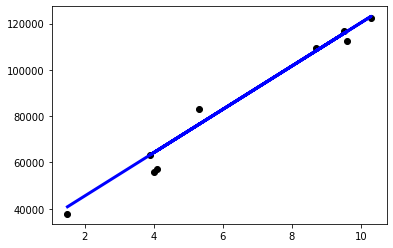

In [68]:
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

# Logistic Regression
classification problem

##
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [3]:
data = pd.read_csv('Data_Science\creditcard.csv')

In [20]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
X = data.iloc[:,:-2] # wszystkie wiersze a kolumny do przed-przedostatniej
Y = data['Class']
Y.value_counts()
print(len(Y))
print(len(X))

284807
284807


In [22]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20)

In [24]:
X.shape

(284807, 29)

In [25]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

### Modelowanie

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_predicted = model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_predicted)

0.9993328885923949

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_predicted)

array([[56864,     5],
       [   33,    60]], dtype=int64)

### Handling unbalanced classes

In [29]:
balanced = LogisticRegression(random_state=0, class_weight='balanced')
balanced.fit(X_train, Y_train)
Y_predicted = balanced.predict(X_test)
accuracy_score(Y_test, Y_predicted)

0.9777395456620203

In [30]:
confusion_matrix(Y_test, Y_predicted)

array([[55610,  1259],
       [    9,    84]], dtype=int64)

# Random Forest - Classifier and SVM

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
# print(iris.DESCR) # opis danych
# print(iris.data)  # features, cechy, zmienne
# print(type(iris.data)) # tablica NumPy ndarray
# print(iris.data.shape) # rozmiar tablicy zwraca tuple
# print(iris.feature_names) # lista nazw dla iris.data
print(iris.target)  # zmienna celu (target)
# print(iris.target.dtype) # tablica NumPy
# print(iris.target.shape) # rozmiary tablicy celu

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


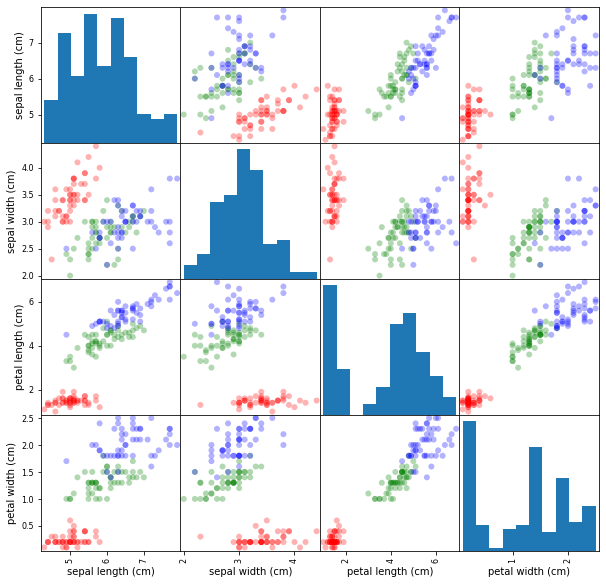

In [12]:
colors = []
palette = {0:"red", 1:"green", 2:"blue"}
for c in np.nditer(iris.target):
    colors.append(palette[int(c)])
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sc = pd.plotting.scatter_matrix(df, alpha=0.3, figsize=(10,10), diagonal="hist", color=colors, marker="o", grid="True")

In [13]:
df['nazwa'] = pd.Categorical.from_codes(iris.target, iris.target_names) # dodajemy kolumnę z nazwą odmiany irysów
df['nazwa_kat'] = pd.factorize(df['nazwa'])[0] # zamieniamy nazwy na liczby
df.head()
# df.shape
# df['nazwa'].unique()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),nazwa,nazwa_kat
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [14]:
# podział danych
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']], df['nazwa_kat'],test_size=0.25)

## SVM

In [15]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')  
svclassifier.fit(x_train, y_train)  # tu się uczy nasz model
y_pred = svclassifier.predict(x_test) # to co chcemy przewidywać

In [16]:
from sklearn.metrics import classification_report, confusion_matrix  # to jak reguła złotego standardu w statystyce
print(confusion_matrix(y_test,y_pred))  # tu przewidujemy, sprawdzamu czy to co model przewiduje zgadza się z y_test
print(classification_report(y_test,y_pred))  

[[12  0  0]
 [ 0 14  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## Model lasu losowego

In [17]:
from sklearn.ensemble import RandomForestClassifier

RFclf = RandomForestClassifier(n_jobs=2, random_state=0)
RFclf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [18]:
RFclf.predict(x_test)

array([0, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1], dtype=int64)

In [19]:
RFclf.predict_proba(x_test[0:5]) # jaka jest pewność decyzji klasyfikatora dla każdej obserwacji

array([[1.  , 0.  , 0.  ],
       [0.  , 0.99, 0.01],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [20]:
klas = iris.target_names[RFclf.predict(x_test)]
klas[0:6]

array(['setosa', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor'], dtype='<U10')

In [22]:
nazwy = iris.target_names[y_test]
nazwy[0:5]

array(['setosa', 'versicolor', 'versicolor', 'versicolor', 'setosa'],
      dtype='<U10')

In [23]:
pd.crosstab(nazwy, klas, rownames=['Nazwy'], colnames=['Klasyfikacja'])

Klasyfikacja,setosa,versicolor,virginica
Nazwy,,,
setosa,12,0,0
versicolor,0,14,1
virginica,0,0,11


In [24]:
list(zip(x_train, RFclf.feature_importances_)) # która zmienna najważniejsza w budowaniu modelu

[('sepal length (cm)', 0.08661155622505846),
 ('sepal width (cm)', 0.03691685186472714),
 ('petal length (cm)', 0.43510443495139417),
 ('petal width (cm)', 0.4413671569588203)]

# KNN - classification

### Założenia modelu:
* brak specjalistycznej fazy szkolenia,
* wykorzystuje wszystkie dane do uczenia podczas klasyfikacji nowego punktu danych,
* jest to nieparametryczny algorytm uczenia sie ':-)'
* obliczana jest odległość nowego punktu danych od pozostałych danych szkoleniowych
* wybiera K punktów (najbliższych)
* przypisuje punkt do klasy do której należy większość z punktów K
#### "Algorytm opiera się na przewidywaniu nieznanych wartości poprzez dopasowanie ich do najbardziej podobnych znanych wartości"


* This dataset consists of 101 animals from a zoo.
* There are 16 variables with various traits to describe the animals.
* The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

* The purpose for this dataset is to be able to predict the classification of the animals, based upon the variables.

In [1]:
import pandas as pd
data = pd.read_csv('zoo.csv')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [2]:
import numpy as np
df = data[['hair', 'milk', 'aquatic', 'eggs', 'class_type']]

In [3]:
X = np.array(df.iloc[:, 0:4]) # pierwsze cztery
y = np.array(df['class_type'])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [6]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [8]:
from sklearn.metrics import accuracy_score, 
pred = knn.predict(X_test)
print (accuracy_score(y_test, pred))

0.7307692307692307


### Evaluation

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [10]:
print(confusion_matrix(y_test, pred))

[[12  0  0  0  0  0  0]
 [ 0  3  0  2  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  1  0  2  0  0  0]]


In [30]:
print(classification_report(y_test, pred, zero_division='warn'))
print (accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.43      0.60      0.50         5
           3       0.00      0.00      0.00         1
           4       0.29      1.00      0.44         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3

    accuracy                           0.65        26
   macro avg       0.24      0.37      0.28        26
weighted avg       0.57      0.65      0.59        26

0.6538461538461539


### Choosing K value

try to pick the best K value as a number of neighbours

In [24]:
accuracy_rate = []

for i in list(range(1, 15)):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    accuracy_rate.append(scores.mean())

In [32]:
error_rate = []

for i in list(range(1, 30)):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    error_rate.append(1-scores.mean())

Text(0, 0.5, 'Error_rate')

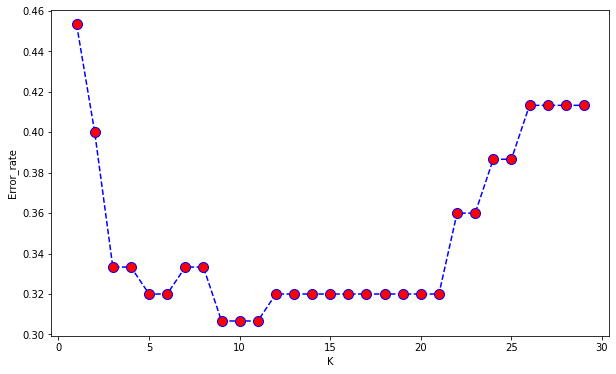

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1, 30), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title = ('Error rate vs K-value')
plt.xlabel('K')
plt.ylabel('Error_rate')

after K = 10

In [37]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('with k = 10')
print('')
# print(confusion_matrix(y_test, pred))
# print(classification_report(y_test, pred, zero_division='warn'))

with k = 10



In [38]:
print (accuracy_score(y_test, pred))

0.6538461538461539
